In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from UltimateField import UltimateGameResults
from UltimateEnvironment import UltimateFrisbeeEnv
from agent import QLearningAgent

In [2]:
# --- initialize UltimateGameResults ie get throwing distribution
GAME_ID, TEAM_EXT_ID = "2023-08-26-SLC-NY", "empire"
game = UltimateGameResults(game_id=GAME_ID, team_ext_id=TEAM_EXT_ID)

check error


/home/yukikongju/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/home/yukikongju/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [3]:
# --- initialize Ultimate Environment
env = UltimateFrisbeeEnv(game_results=game)

In [9]:
# --- test episodes
for _ in range(100):
    state, _ = env.reset()
    done = False
    while not done: 
        selected_action = np.random.choice(range(env.n_actions))
        next_state, reward, done, info = env.step(selected_action)
        # print(info)

In [34]:
# --- debug agent

In [50]:
# --- train qlearning agent
agent = QLearningAgent(alpha=0.1, gamma=0.1, epsilon=0.05, field_length=env.field_length, 
                      field_width=env.field_width, n_actions=env.n_actions)
for episode in range(10000):
    state, _ = env.reset()
    done = False
    while not done:
        action = agent.choose_action(state)
        next_state, reward, done, info = env.step(action)
        agent.update_q_table(state, next_state, action, reward)
        agent.update_v_table(state, next_state, action, reward)
        state = next_state
        

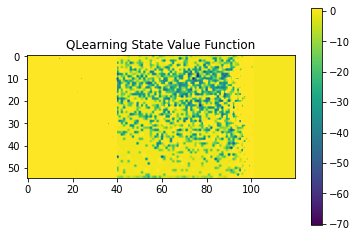

In [51]:
agent.render_v_function()

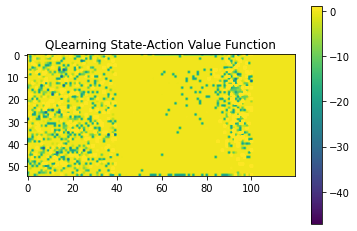

In [54]:
agent.render_q_function(action=8)

(55, 120, 10)